<font size="50">  Monitoramento dos preços de abóboras

Mais de 1,5 bilhões de libras de abóbora são cultivadas anualmente nos Estados Unidos. Onde são vendidos e por quanto?

Este conjunto de dados contém os preços pelos quais as abóboras foram vendidas em mercados terminais de cidades dos EUA selecionadas. Os preços são diferenciados pela origem crescente das commodities, variedade, tamanho, embalagem e qualidade.

Este conjunto de dados contém preços de mercado de terminal para diferentes safras de abóbora em 13 cidades nos Estados Unidos de 24 de setembro de 2016 a 30 de setembro de 2017. De acordo com a estrutura dos dados de origem original, as informações sobre cada cidade foram carregadas como um arquivo separado.

- Atlanta, GA
- Baltimore, MD
- Boston, MA
- Chicago, IL
- Columbia, SC
- Dallas, TX
- Detroit, MI
- Los Angeles, CA
- Miami, FL
- New York, NY
- Philadelphia, PA
- San Francisco, CA
- Saint Louis, MO

Os dados de cada cidade incluem as seguintes colunas (embora nem todas as informações estejam disponíveis para todas as cidades):

- Nome da mercadoria: sempre abóbora, uma vez que este é um conjunto de dados apenas de abóbora
- Nome da cidade: cidade onde a abóbora foi vendida
- Tipo
- Pacote
- Variedade
- Sub Variedade
- Grau: Nos EUA, geralmente apenas a abóbora em lata é classificada
- Data: Data da venda (arredondado para o sábado mais próximo)
- Preço baixo
- Preço Alto
- Principalmente Baixo
- Principalmente Alto
- Origem: onde as abóboras foram cultivadas
- Distrito de Origem
- Tamanho do item
- Cor
- Meio Ambiente
- Unidade de Venda
- Qualidade
- Doença
- Aparência
- Armazenamento
- Colheita
- Reembalar: se a abóbora foi reembalada antes da venda
- Modo Trans

Fonte: https://www.kaggle.com/usda/a-year-of-pumpkin-prices


 <font size="30">  Tarefas

1. Fazer a leitura de todos os arquivos e armazená-los em um único DataFrame.
2. Checar se a coluna referente à data está sendo interpretada como data mesmo.
3. Analisar desvio padrão, valores mínimo e máximo, dados totais em cada coluna do DataFrame.
4. Identificar a presença de NaN.
5. Deletar as colunas que contém NaN.
6. A partir dos dados de preços alto e baixo, calcular um preço médio para cada abóbora e analisar o comportamento desse preço médio ao longo do período de monitoramento. 
7. Analisar os preços baixo e alto que cada cidade assumiu no período de monitoramento. Compará-los. 
8. Quais são as 3 embalagens (package) mais caras? E as mais baratas?

 ## 1. Fazer a leitura de todos os arquivos e armazená-los em um único DataFrame.

In [158]:
from glob import glob
import pandas as pd

In [152]:
pwd

'C:\\Users\\Julia\\Downloads\\Python 07-04-2021\\Estudo de Caso 2'

In [156]:
file_path = glob('C:\\Users\\Julia\\Downloads\\Python 07-04-2021\\Estudo de Caso 2\\*.csv')

In [157]:
file_path[0]

'C:\\Users\\Julia\\Downloads\\Python 07-04-2021\\Estudo de Caso 2\\atlanta_9-24-2016_9-30-2017.csv'

In [163]:
df = pd.read_csv(file_path[0])

In [160]:
df.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [161]:
df = pd.read_csv(file_path[1])

In [162]:
df.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,04/29/2017,270,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
1,PUMPKINS,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,05/06/2017,270,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN
2,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/05/2016,90,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [165]:
data = None
for path in file_path:
    df = pd.read_csv(path)
    if data == None:
        data = df
    else:
        data = pd.concat([data,df])

In [169]:
data.loc[0,'City Name']

0          ATLANTA
0        BALTIMORE
0           BOSTON
0          CHICAGO
0         COLUMBIA
0           DALLAS
0          DETROIT
0      LOS ANGELES
0            MIAMI
0         NEW YORK
0     PHILADELPHIA
0    SAN FRANCISCO
0        ST. LOUIS
Name: City Name, dtype: object

In [170]:
data.reset_index(drop=True,inplace=True)
#data = data.reset_index(drop=True)

In [175]:
data[['City Name','Package']]

,City Name,Package
0,ATLANTA,24 inch bins
1,ATLANTA,24 inch bins
2,ATLANTA,24 inch bins
3,ATLANTA,24 inch bins
4,ATLANTA,24 inch bins
...,...,...
1752,ST. LOUIS,22 lb cartons
1753,ST. LOUIS,36 inch bins
1754,ST. LOUIS,36 inch bins
1755,ST. LOUIS,36 inch bins


In [178]:
grupos = data.groupby(['City Name'])

In [179]:
grupos.groups.keys()

dict_keys(['ATLANTA', 'BALTIMORE', 'BOSTON', 'CHICAGO', 'COLUMBIA', 'DALLAS', 'DETROIT', 'LOS ANGELES', 'MIAMI', 'NEW YORK', 'PHILADELPHIA', 'SAN FRANCISCO', 'ST. LOUIS'])

In [181]:
grupos.get_group('BALTIMORE')

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments
57,PUMPKINS,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,04/29/2017,270.0,280.0,...,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN
58,PUMPKINS,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,05/06/2017,270.0,280.0,...,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN
59,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160.0,160.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
60,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160.0,160.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
61,PUMPKINS,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/05/2016,90.0,100.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,PUMPKINS,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,NaN,NaN,09/30/2017,18.0,18.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
206,PUMPKINS,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,NaN,NaN,09/30/2017,18.0,18.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
207,PUMPKINS,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,ROUND TYPE,NaN,09/24/2016,15.0,15.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
208,PUMPKINS,BALTIMORE,NaN,1/2 bushel cartons,MINIATURE,ROUND TYPE,NaN,10/01/2016,15.0,15.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


## 2. Checar se a coluna referente à data está sendo interpretada como data mesmo.

In [184]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [189]:
data['Date'][0]

'09/24/2016'

In [190]:
from datetime import datetime 


In [192]:
a = datetime.strptime(data['Date'][0], "%m/%d/%Y")

In [196]:
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

In [197]:
data['Date'][0]

Timestamp('2016-09-24 00:00:00')

## 3. Analisar desvio padrão, valores mínimo e máximo, dados totais em cada coluna do DataFrame.

In [198]:
data.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Offerings,Price Comment,Comments
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Identificar a presença de NaN.

## 5. Deletar as colunas que contém NaN.

In [199]:
data.dropna(inplace=True,axis=1)

In [200]:
data.head()

,Commodity Name,City Name,Package,Date,Low Price,High Price,Repack
0,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,140.0,154.75,N
1,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,145.0,154.75,N
2,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,150.0,154.75,N
3,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,150.0,150.00,N
4,PUMPKINS,ATLANTA,24 inch bins,2016-10-01,140.0,154.75,N


## 6. A partir dos dados de preços alto e baixo, calcular um preço médio para cada abóbora e analisar o comportamento desse preço médio ao longo do período de monitoramento. 

In [127]:
data.columns

Index(['Commodity Name', 'City Name', 'Package', 'Date', 'Low Price',
       'High Price', 'Repack'],
      dtype='object')

In [201]:
data['Mean Price'] = (data['Low Price']+ data['High Price'])/2

In [202]:
data.head()

,Commodity Name,City Name,Package,Date,Low Price,High Price,Repack,Mean Price
0,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,140.0,154.75,N,147.375
1,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,145.0,154.75,N,149.875
2,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,150.0,154.75,N,152.375
3,PUMPKINS,ATLANTA,24 inch bins,2016-09-24,150.0,150.00,N,150.000
4,PUMPKINS,ATLANTA,24 inch bins,2016-10-01,140.0,154.75,N,147.375


In [203]:
df = data.copy()

In [209]:
df = df[['Date','Mean Price']]

In [210]:
grupos = df.groupby(['Date']).mean()

In [207]:
grupos.sort_index(inplace=True)

In [226]:
grupos.sort_values(by='Mean Price')

,Mean Price
Date,
2016-12-03,73.400000
2016-09-30,82.226190
2016-11-19,96.342593
2016-12-10,97.888889
2017-09-09,99.313793
2016-09-29,99.852273
2016-11-12,99.902778
2017-08-12,104.333333
2017-01-14,105.000000


In [212]:
import matplotlib.pyplot as plt

In [144]:
plt.rcParams['figure.figsize'] = (15,7)

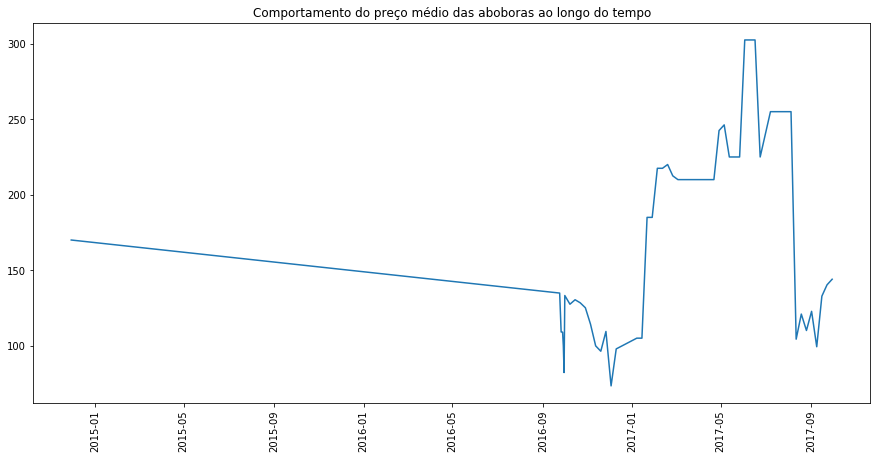

In [213]:
plt.plot(grupos.index,grupos.values)
plt.xticks(rotation=90)
plt.title('Comportamento do preço médio das aboboras ao longo do tempo')
plt.show()

## 7. Analisar os preços baixo e alto que cada cidade assumiu no período de monitoramento. Compará-los. 

## 8. Quais são as 3 embalagens (package) mais caras? E as mais baratas?